## Visualize Raw Data and Make Movies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
import pandas as pd

#from sys import path
from os.path import sep, exists
from os import mkdir, makedirs, getcwd

from scipy.ndimage import gaussian_filter

import xarray as xr

#from fly2p.viz.viz import myAxisTheme
#import fly2p.preproc.imgPreproc as imp
from unityvr.analysis.stimAnalysis import convertTextureVals, deriveTexVals
from unityvr.preproc import logproc as lp

import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
%config Completer.use_jedi = False  #magic to fix autocomplete issue

In [2]:
onCluster = True
useNapari = False #and not onCluster

In [3]:
rootDir = '/Volumes/reiserlab/Pavi/Caliberation/test_log_files/'
#Volumes/

subdir = 'preproc'
# genotype = 'SS00238_x_SP-I-7f'
# region = 'EB-BU'
# flyID = 'f06'
# condition = 'pOLmapRF2-10-20-30'
# trial = 'trial01'

In [4]:
plotDir = sep.join([rootDir, 'plot'])
preprocDir = sep.join([rootDir,subdir])

In [5]:
# Generate directory where to save plots
saveDir = sep.join([plotDir, 'DFF']) #condition
if not exists(saveDir):
    makedirs(saveDir)
print(saveDir)

ppsaveDir = sep.join([preprocDir])
if not exists(ppsaveDir):
    makedirs(ppsaveDir)
print(ppsaveDir)

/Volumes/reiserlab/Pavi/Caliberation/test_log_files//plot/DFF
/Volumes/reiserlab/Pavi/Caliberation/test_log_files//preproc


In [6]:
path2imgdat = sep.join([ppsaveDir, 'img'])
stackMC = xr.open_dataarray(path2imgdat+sep+'stackMPMC.nc', 
                            engine="scipy")
dffStack = xr.open_dataarray(path2imgdat+sep+'dffStack.nc', 
                            engine="scipy")
with open(path2imgdat+sep+'imgMetadata.json') as f:
    import json
    imgMetadat = json.load(f)

In [7]:
path2unity = sep.join([ppsaveDir, 'uvr'])
uvrTrial = lp.loadUVRData(path2unity)
# uvrTrial.texDf = deriveTexVals(convertTextureVals(uvrTrial.texDf))

In [8]:
from unityvr.analysis.align2img import *

Truncated recording. Difference in length: 87 unity frames


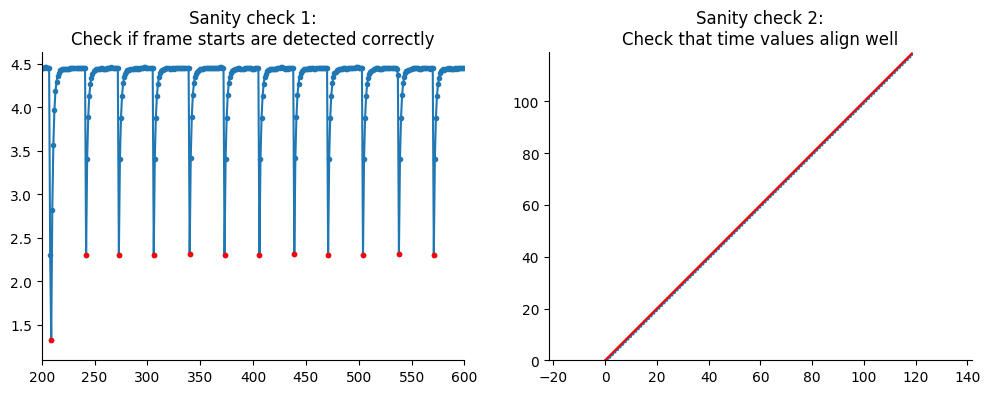

In [11]:
expDf = generateUnityExpDf(dffStack['volumes [s]'].values, uvrTrial, imgMetadat, findImgFrameTimes_params = {'diffVal':1}, debugAlignmentPlots_params= {'lims':[200,600]}, )

## Sweep Videos

In [12]:
dffStack = truncateImgDataToUnityDf(dffStack, expDf)
stackMC = truncateImgDataToUnityDf(stackMC, expDf)

In [13]:
Nbins = 200
sweepOrder = [1,-1] #left handed convention: +1 is clockwise sweep from the fly's PoV (ie left to right) and -1 is counterclockwise (right to left)
forward = -1 #-1 = counterclockwise sweep forward in time, 1 = clockwise sweep forward in time
timeColors = ['crimson', 'steelblue'] #[forward, backward]

In [15]:
# to parse my png file data
# plt.plot(expDf['time'],expDf['img'].str[-10:-4].astype('float').values.astype(int))

In [16]:
uvrTrial.vidDf.head(60)

,frame,time,img,duration
0,2.0,0.020000,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
1,3.0,0.030549,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
2,4.0,0.104532,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
3,5.0,0.174403,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
4,6.0,0.182833,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
5,7.0,0.256314,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
6,8.0,0.325458,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
7,9.0,0.333268,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
8,10.0,0.340660,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
9,11.0,0.347789,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333


In [19]:
expDf.head(60)

,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt,volumes [s],img,duration
0,2.0,0.020000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.141295e+16,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
1,6.0,0.182833,0.008430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.121996e-313,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
2,9.0,0.333268,0.007810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.432367e-313,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
3,29.0,0.475971,0.006994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.464732e+218,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
4,52.0,0.639091,0.006792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.697597e-311,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
5,76.0,0.807783,0.007171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.387258e+272,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
6,99.0,0.970103,0.007177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.526821e+139,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
7,123.0,1.138546,0.006230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.010458e-313,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
8,149.0,1.303889,0.006168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.266437e-153,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333
9,175.0,1.468142,0.006608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.086462e-311,C:\Users\seenivasanp\Desktop\flickering_full_f...,0.008333


In [17]:
bins = np.linspace(expDf['stimAngle'].min(), expDf['stimAngle'].max(), Nbins) if forward == 1 else np.linspace(expDf['stimAngle'].max(), expDf['stimAngle'].min(), Nbins)
digitized = np.digitize(expDf['stimAngle'].values, bins)
binnedX = bins[digitized-1]
meanStack = np.zeros([2, Nbins, stackMC.shape[1], stackMC.shape[2], stackMC.shape[3]])
meanDff = np.zeros([2, Nbins, dffStack.shape[1], dffStack.shape[2], dffStack.shape[3]])

KeyError: 'stimAngle'

In [ ]:
for d,dir in enumerate(sweepOrder):
    for i in range(Nbins):
        condition = (binnedX==bins[i]) & (dir*expDf['stimVel']>0) & (expDf['stimSpeed']==10)
        if np.sum(condition)>0:
            meanStack[d,i,:,:,:] = stackMC[condition,:,:,:].mean(axis=0).values
            meanDff[d,i,:,:,:] = dffStack[condition,:,:,:].mean(axis=0).values
            if i%int(Nbins/10)==0:
                print('.',end="")
        else:
            meanStack[d,:,:,:]==0
            meanDff[d,:,:,:]==0
            print('x',end="")
    print("\n")

### instead of dffstack, use roiDf as an input to this big function: just make sure it has "volume/s": basically give a dataframe instead of xarray. 

In [ ]:
1+1

In [ ]:
if useNapari: 
    import napari
    viewer = napari.view_image(meanDff.max(axis=2))

In [ ]:
RFstimDeg = 5
intensityClip = [90,99.95]

In [ ]:
raw_or_dff = "raw"

In [ ]:
%%capture

maxStack = meanStack.max(axis=2) if raw_or_dff == "raw" else gaussian_filter(meanDff.max(axis=2), sigma=[0,0,2,2])

#initialize
fig,ax = plt.subplots(2,2,figsize = (8,6),gridspec_kw={'height_ratios': [6, 1.5]})

img = ax[0,0].imshow(maxStack[0,0,:,:],vmin=np.percentile(maxStack,intensityClip[0]),vmax=np.percentile(maxStack,intensityClip[1]));
img2 = ax[0,1].imshow(maxStack[1,0,:,:],vmin=np.percentile(maxStack,intensityClip[0]),vmax=np.percentile(maxStack,intensityClip[1]));


line1f = ax[1,0].axvline(bins[0]+RFstimDeg/2*sweepOrder[0],color='k', alpha=1,zorder=-1);
line1b = ax[1,0].axvline(bins[0]-RFstimDeg/2*sweepOrder[0],color='k', alpha=0.5,zorder=-1);
arrow1 = ax[1,0].arrow(bins[0]-RFstimDeg/2*sweepOrder[0], 0.5, 4*RFstimDeg*sweepOrder[0], 0, head_length=5, width=0.02, length_includes_head=True, color=[timeColors[i] for i,j in enumerate(
    sweepOrder) if j==forward][0],zorder=1);
line2f = ax[1,1].axvline(bins[0]+RFstimDeg/2*sweepOrder[1],color='k', alpha=1,zorder=-1);
line2b = ax[1,1].axvline(bins[0]-RFstimDeg/2*sweepOrder[1],color='k', alpha=0.5,zorder=-1);
arrow2 = ax[1,1].arrow(bins[0]-RFstimDeg/2*sweepOrder[1], 0.5, 4*RFstimDeg*sweepOrder[1], 0, head_length=5, width=0.02, length_includes_head=True, color=[timeColors[i] for i,j in enumerate(
    sweepOrder) if j!=forward][0],zorder=1);
legend = ax[1,1].legend(['ON-edge', 'OFF-edge'], frameon=False, bbox_to_anchor=[-0.1,1.5], loc='upper left',mode = "expand", ncol = 2)

for i,_ in enumerate(sweepOrder):
    ax[1,i].set_xlim(-180,180)
    ax[1,i].set_ylim(0,1)
    ax[1,i].set_xlabel("stimulus position (°)")
    ax[1,i].set_yticks([])
    sns.despine(ax=ax[1,i], left=True)

def animate(i):
    img.set_data(maxStack[0,i,:,:])
    img2.set_data(maxStack[1,i,:,:])
    line1f.set_data([bins[i]+RFstimDeg/2*sweepOrder[0], bins[i]+RFstimDeg/2*sweepOrder[0]], [0, 1])
    line1b.set_data([bins[i]-RFstimDeg/2*sweepOrder[0], bins[i]-RFstimDeg/2*sweepOrder[0]], [0, 1])
    arrow1.set_data(x=bins[i]-RFstimDeg/2*sweepOrder[0], y=0.5, dx=4*RFstimDeg*sweepOrder[0], dy=0)
    line2f.set_data([bins[i]+RFstimDeg/2*sweepOrder[1], bins[i]+RFstimDeg/2*sweepOrder[1]], [0, 1])
    line2b.set_data([bins[i]-RFstimDeg/2*sweepOrder[1], bins[i]-RFstimDeg/2*sweepOrder[1]], [0, 1])
    arrow2.set_data(x=bins[i]-RFstimDeg/2*sweepOrder[1], y=0.5, dx=4*RFstimDeg*sweepOrder[1], dy=0)

In [ ]:
ani = FuncAnimation(fig, animate, interval=40, frames=Nbins)
HTML(ani.to_jshtml())

In [ ]:
dirLabel = "left" if forward==1 else "right"
ani.save(sep.join([saveDir, dirLabel+"_forward_sweep_"+raw_or_dff+"_averaged_over_elevation.mp4"]), dpi=350, writer=FFMpegWriter(fps=10));
ani.save(sep.join([saveDir, dirLabel+"_forward_sweep_"+raw_or_dff+"_averaged_over_elevation.gif"]), dpi=350, writer=PillowWriter(fps=10));

In [ ]:
1+1